# Currency Ising Model Visualisations

### Import Libraries

In [1]:
# Import necessary libraries for data handling and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Set up the visualisation settings for seaborn
sns.set_theme(style="whitegrid")

### Load Optimised Parameters

##### Define the file paths for the optimised J matrix and h vector

In [2]:
J_matrix_file_path = 'Results/J_matrix.csv'  # Path to the J matrix csv file
h_vector_file_path = 'Results/h_vector.csv'  # Path to the h vector csv file
# 
# J_matrix_file_path = 'Results/optimised_J_matrix.csv'  # Path to the optimised J matrix csv file
# h_vector_file_path = 'Results/optimised_h_vector.csv'  # Path to the optimised h vector csv file
# 
# J_matrix_file_path = 'Results/optimised_J_matrix_extended.csv'  # Path to the extended optimised J matrix csv file
# h_vector_file_path = 'Results/optimised_h_vector_extended.csv'  # Path to the extended optimised h vector csv file

# J_matrix_file_path = 'Results/final_J_matrix_extended.csv'  # Path to the fianl J matrix csv file
# h_vector_file_path = 'Results/final_h_vector_extended.csv'  # Path to the final h vector csv file

# Load the optimised J matrix from the csv file
J_optimised_df = pd.read_csv(J_matrix_file_path)

# Extract currency symbols from the DataFrame
symbols = J_optimised_df.columns.tolist()

# Convert the DataFrame to a numpy array
J_optimised = J_optimised_df.values

# Load the optimised h vector from the Excel file
h_optimised = pd.read_csv(h_vector_file_path, header=None)[1].values

# Confirm the shapes of the loaded J matrix and h vector
print(f"Shape of optimised J matrix: {J_optimised.shape}")
print(f"Length of optimised h vector: {len(h_optimised)}")

Shape of optimised J matrix: (26, 26)
Length of optimised h vector: 26


### Function to Add Title and Subtitle

In [3]:
# Define a function to add a title and a subtitle to a matplotlib figure
def add_title_and_subtitle(title, subtitle, title_space=1.06, subtitle_space=1.03):
    """
    Add a main title and a subtitle to a matplotlib figure.

    Parameters:
    title (str): The main title text.
    subtitle (str): The subtitle text.
    title_space (float): The space above the title. Default is 1.06.
    subtitle_space (float): The space for the subtitle just below the title. Default is 1.03.
    """
    plt.title(title, y=title_space, fontsize=20)  # Add the main title with space adjustment
    plt.text(x=0.5, y=subtitle_space, s=subtitle, fontsize=16,
             ha='center', va='bottom', transform=plt.gca().transAxes)  # Add the subtitle

### Plot Heatmap of J Matrix

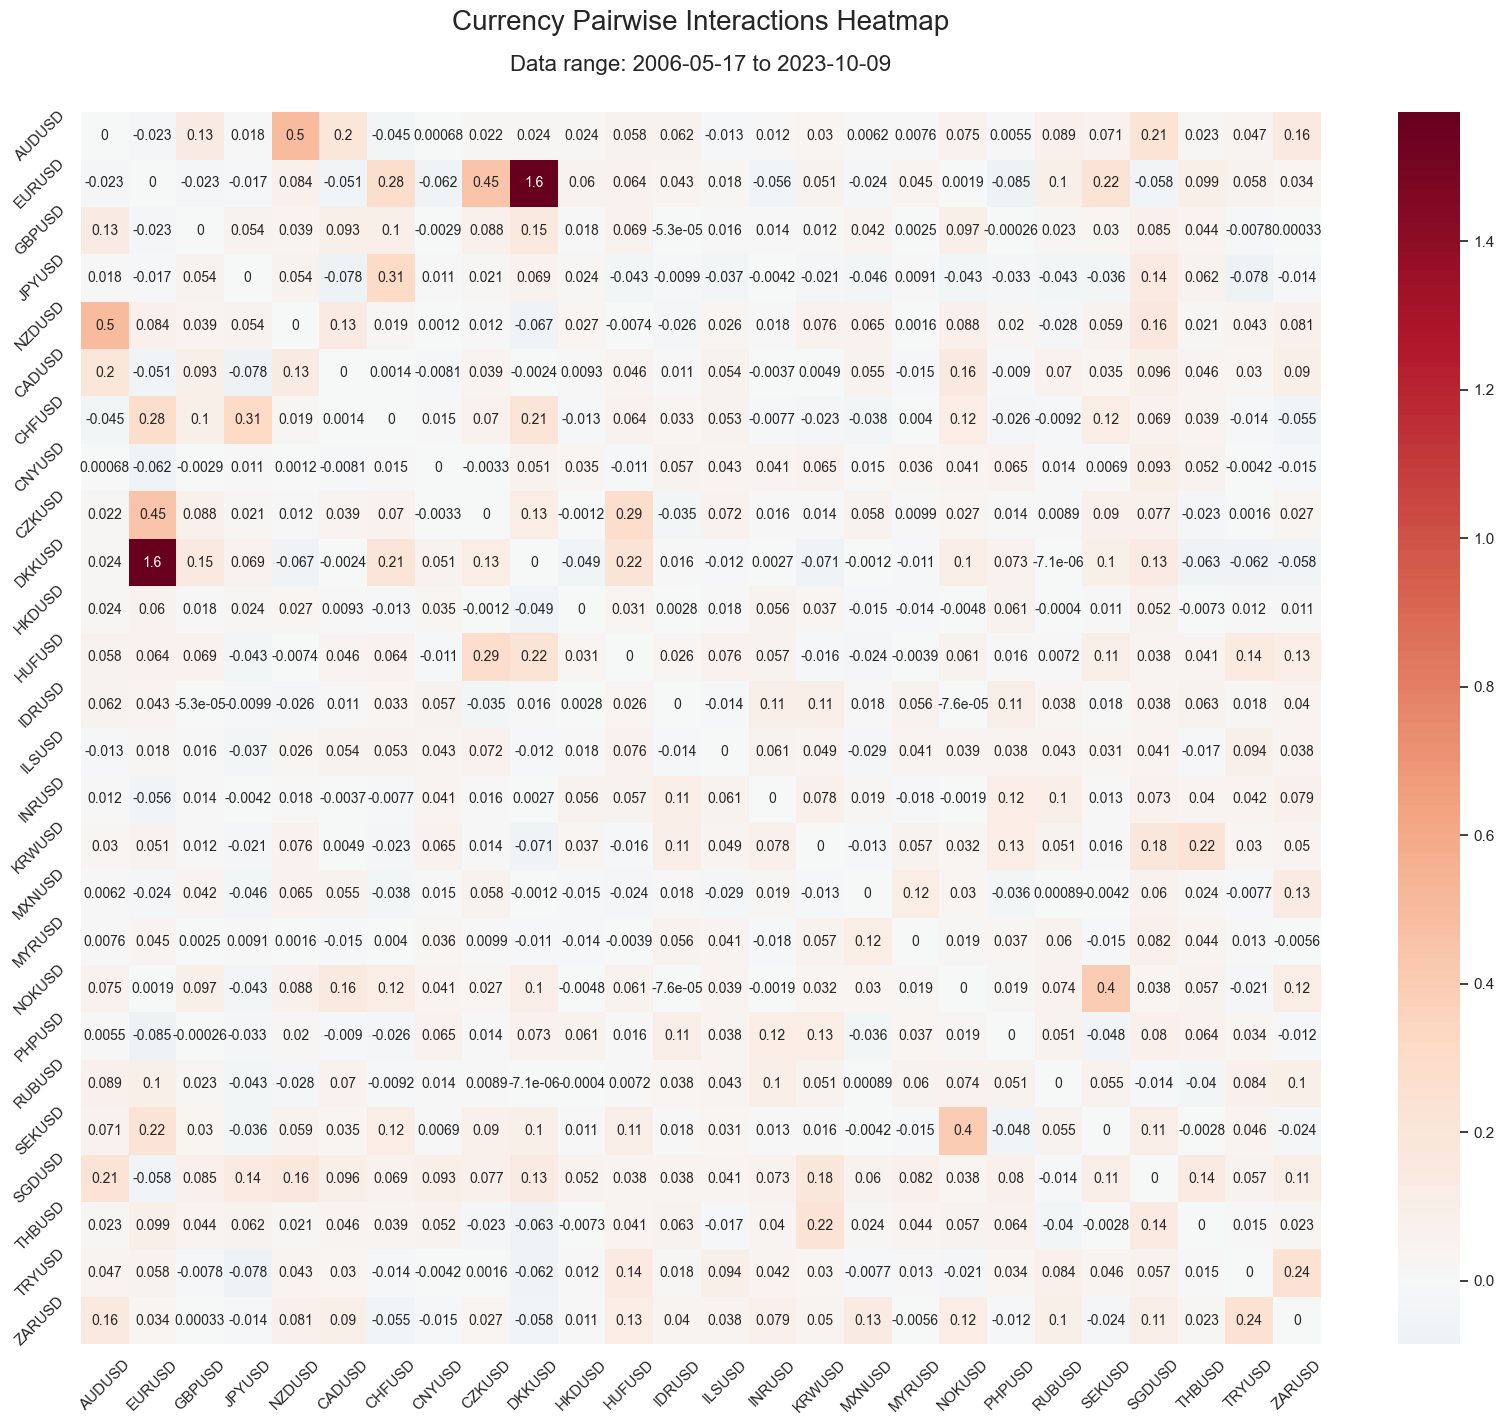

In [4]:
# Define a function to visualise the J matrix as a heatmap
def plot_heatmap(J, labels, title, subtitle):
    """
    Create a heatmap visualisation of the interaction matrix J.

    Parameters:
    J (np.array): The J matrix to be visualised.
    labels (list): The labels for the axes.
    """
    plt.figure(figsize=(20, 16))  # Set the size of the heatmap figure
    sns.heatmap(J, annot=True, annot_kws={"size": 10}, cmap='RdBu_r', center=0,
                xticklabels=labels, yticklabels=labels)  # Create the heatmap with annotations
    plt.xticks(rotation=45)  # Rotate x labels for better fit
    plt.yticks(rotation=45)  # Rotate y labels for better fit
    add_title_and_subtitle(title, subtitle)  # Add title and subtitle
    plt.show()  # Display the heatmap

# Visualise the optimised J matrix using the defined function
plot_heatmap(J_optimised, symbols, "Currency Pairwise Interactions Heatmap", "Data range: 2006-05-17 to 2023-10-09")

### Plot Bar Chart of h Vector

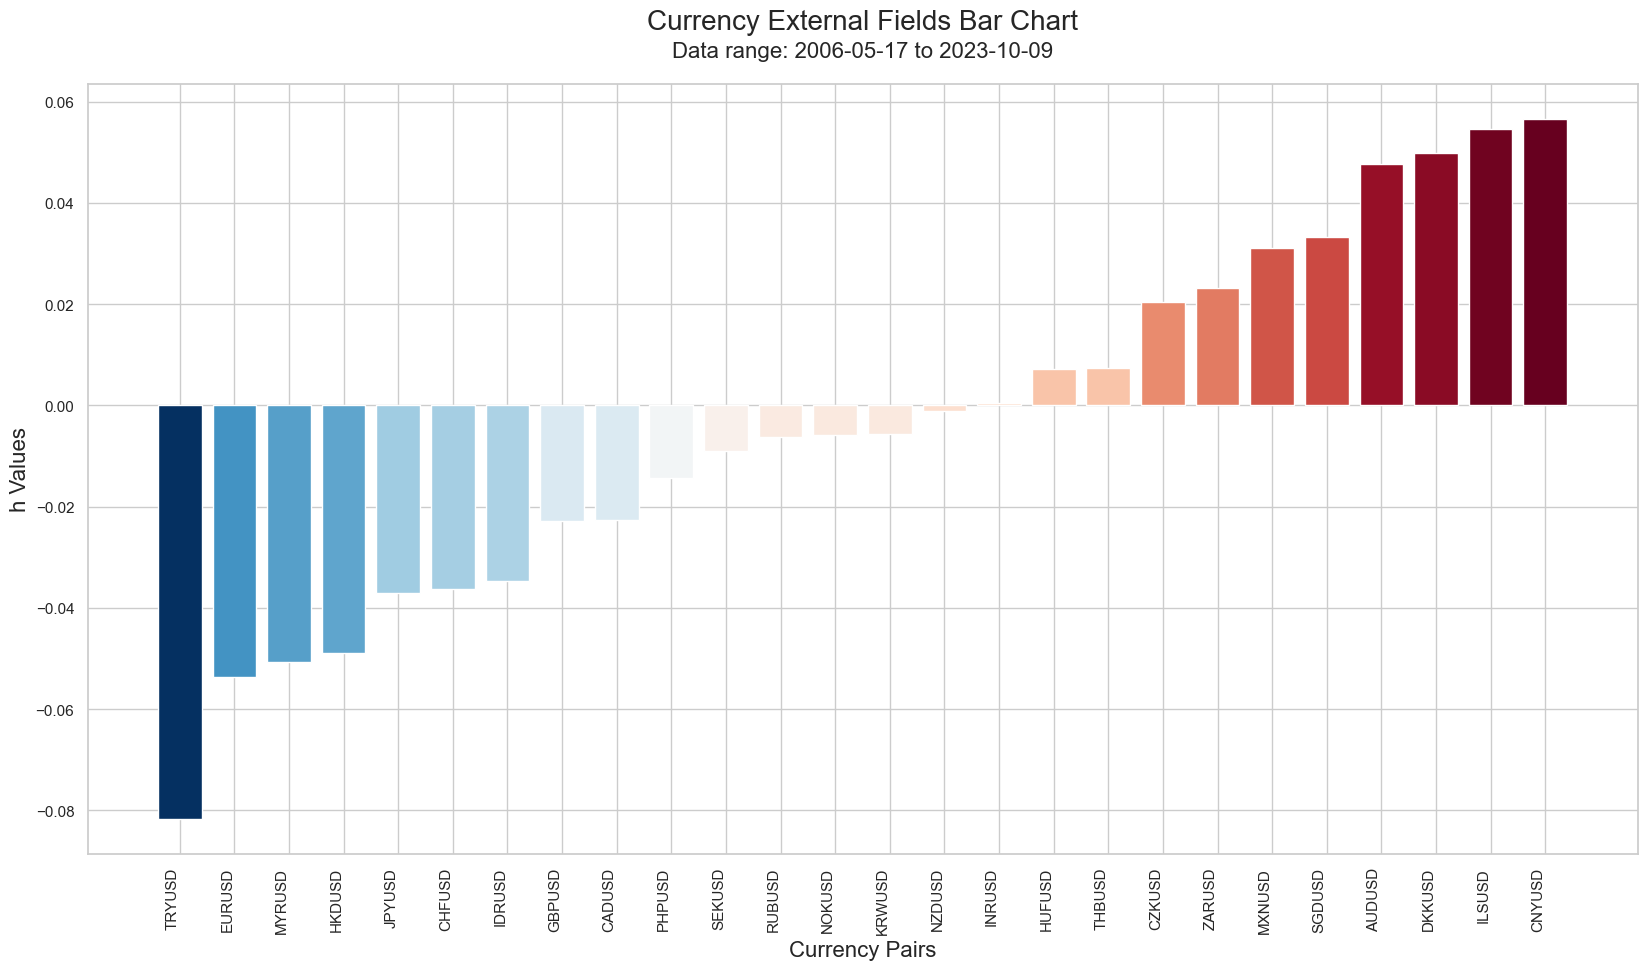

In [5]:
import matplotlib.cm as cm

# Define a function to visualise the h vector as a bar heatmap
def plot_external_field_barchart(h, labels):
    """
    Create a bar chart visualisation of the external field vector h.

    Parameters:
    h (np.array): The h vector to be visualised.
    labels (list): The labels for the bars.
    """
    # Normalize h values to the range [0, 1] for color mapping
    norm = plt.Normalize(min(h), max(h))
    # Create a color map
    cmap = cm.ScalarMappable(norm=norm, cmap='RdBu_r')

    # Sort the h values and corresponding labels
    sorted_indices = np.argsort(h)
    h_sorted = h[sorted_indices]
    labels_sorted = np.array(labels)[sorted_indices]

    # Set the figure size for better visibility
    plt.figure(figsize=(20, 10))

    # Create a barplot with sorted labels and h values
    for i, value in enumerate(h_sorted):
        color = cmap.to_rgba(value)
        plt.bar(labels_sorted[i], value, color=color)

    # Rotate the tick labels for better readability
    plt.xticks(rotation=90, ha='right')

    # Set the title and axis labels
    plt.xlabel("Currency Pairs", fontsize=16)
    plt.ylabel("h Values", fontsize=16)
    add_title_and_subtitle("Currency External Fields Bar Chart", "Data range: 2006-05-17 to 2023-10-09")

    # Show the bar plot
    plt.show()

# Visualise the optimised h vector using the defined function
plot_external_field_barchart(h_optimised, symbols)

### Plot Histograms of J and h

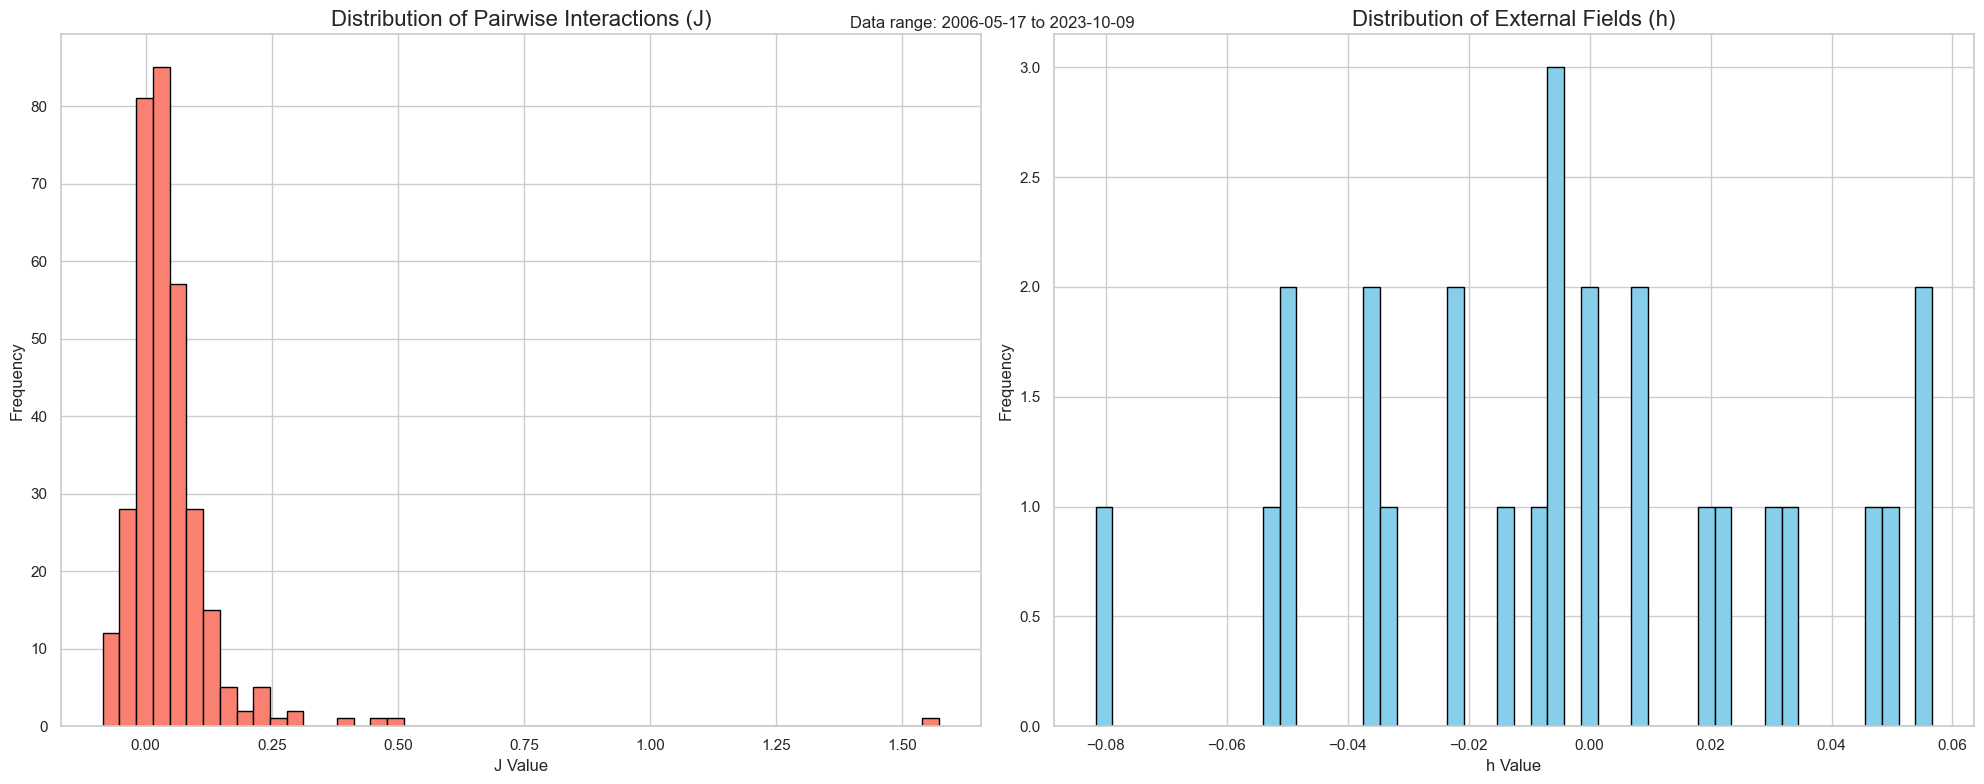

In [6]:
# Define a function to plot histograms for the J matrix and h vector
def plot_histograms(J, h, labels):
    """
    Plot histograms for the pairwise interactions (J matrix) and external fields (h vector).
    
    Args:
    J (numpy.ndarray): Pairwise interactions matrix.
    h (numpy.ndarray): External fields vector.
    labels (list): Labels for the currencies.
    """
    J_values = J[np.triu_indices_from(J, k=1)]  # Extract upper triangular elements of J

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    axes[0].hist(J_values, bins=50, color='salmon', edgecolor='black')
    axes[0].set_title('Distribution of Pairwise Interactions (J)', fontsize=16)
    axes[0].set_xlabel('J Value')
    axes[0].set_ylabel('Frequency')

    axes[1].hist(h, bins=50, color='skyblue', edgecolor='black')
    axes[1].set_title('Distribution of External Fields (h)', fontsize=16)
    axes[1].set_xlabel('h Value')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.suptitle("Data range: 2006-05-17 to 2023-10-09", fontsize=12, y=0.97)
    plt.show()

# Visualise the distributions of J and h
plot_histograms(J_optimised, h_optimised, symbols)

### Visualisation of Currency Interactions as a Network Graph

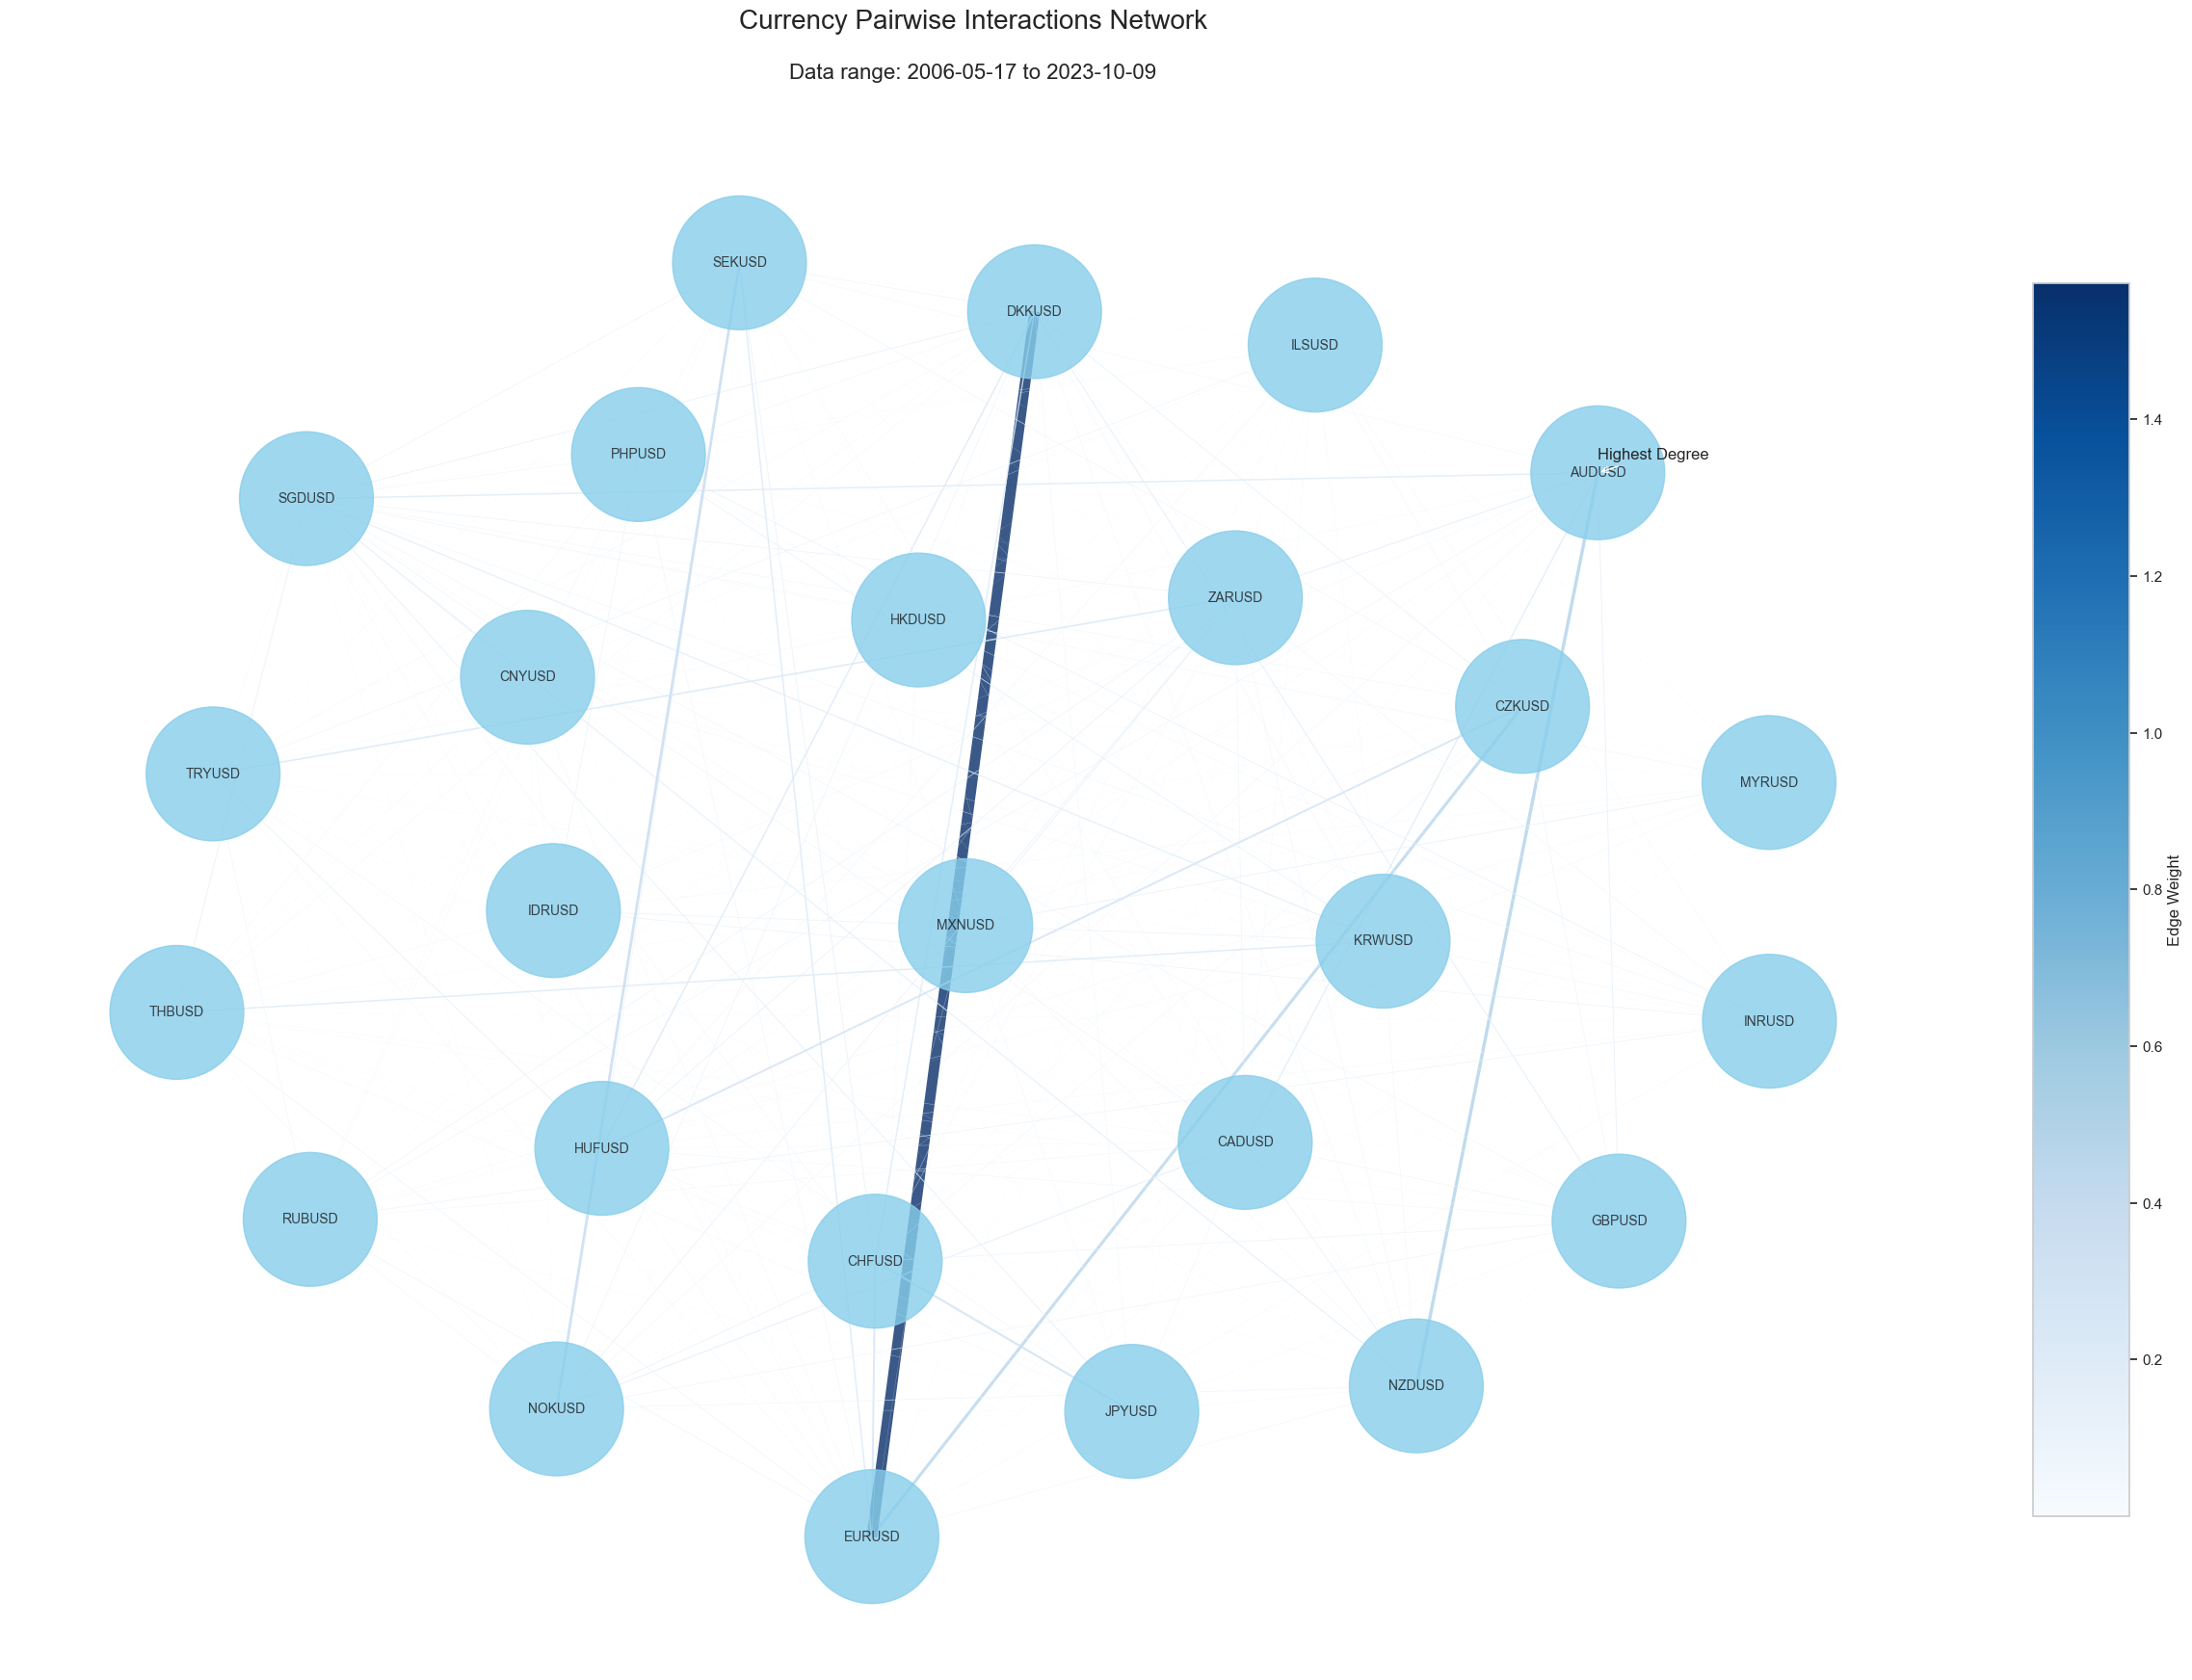

In [7]:
# Now let's define the function to draw the network graph using the optimised J matrix.
def draw_graph_from_matrix(J_matrix, SYMBOLS, title, subtitle):
    threshold = 0  # Set a threshold for including edges

    G = nx.Graph()  # Create a graph

    # Iterate over the upper triangle of the matrix since it's symmetric
    for i in range(J_matrix.shape[0]):
        for j in range(i+1, J_matrix.shape[1]):
            if abs(J_matrix[i][j]) > threshold:
                G.add_edge(SYMBOLS[i], SYMBOLS[j], weight=abs(J_matrix[i][j]))

    # Get edge weights for drawing
    edge_weights = nx.get_edge_attributes(G, 'weight')

    # Normalise node sizes based on their degree
    node_size_norm = [10000 * (deg / max(dict(G.degree()).values())) for _, deg in G.degree()]

    pos = nx.spring_layout(G, weight=None)  # Use spring layout for node positions

    plt.figure(figsize=(20, 16))  # Set the figure size

    # Draw the graph
    nx.draw(G, pos, with_labels=True, labels={node: node for node in G.nodes()},
            node_size=node_size_norm, node_color="skyblue",
            edge_color=[edge_weights[e] for e in G.edges()],
            width=[5 * abs(edge_weights[e]) for e in G.edges()], edge_cmap=plt.cm.Blues,
            font_size=10, alpha=0.8)

    # Annotate the node with the highest degree
    highest_degree_node = max(G.degree, key=lambda x: x[1])[0]
    plt.annotate('Highest Degree', xy=pos[highest_degree_node], xytext=(0,10),
                 textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))

    add_title_and_subtitle(title, subtitle)  # Add title and subtitle to the plot

    # Add a color bar for edge weights
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_weights.values()), vmax=max(edge_weights.values())))
    sm.set_array([])
    cbar_ax = plt.gca().inset_axes([1.05, 0.1, 0.05, 0.8])
    plt.colorbar(sm, cax=cbar_ax, orientation="vertical", label="Edge Weight")

    plt.show()  # Display the plot

draw_graph_from_matrix(J_optimised, symbols, "Currency Pairwise Interactions Network", "Data range: 2006-05-17 to 2023-10-09")

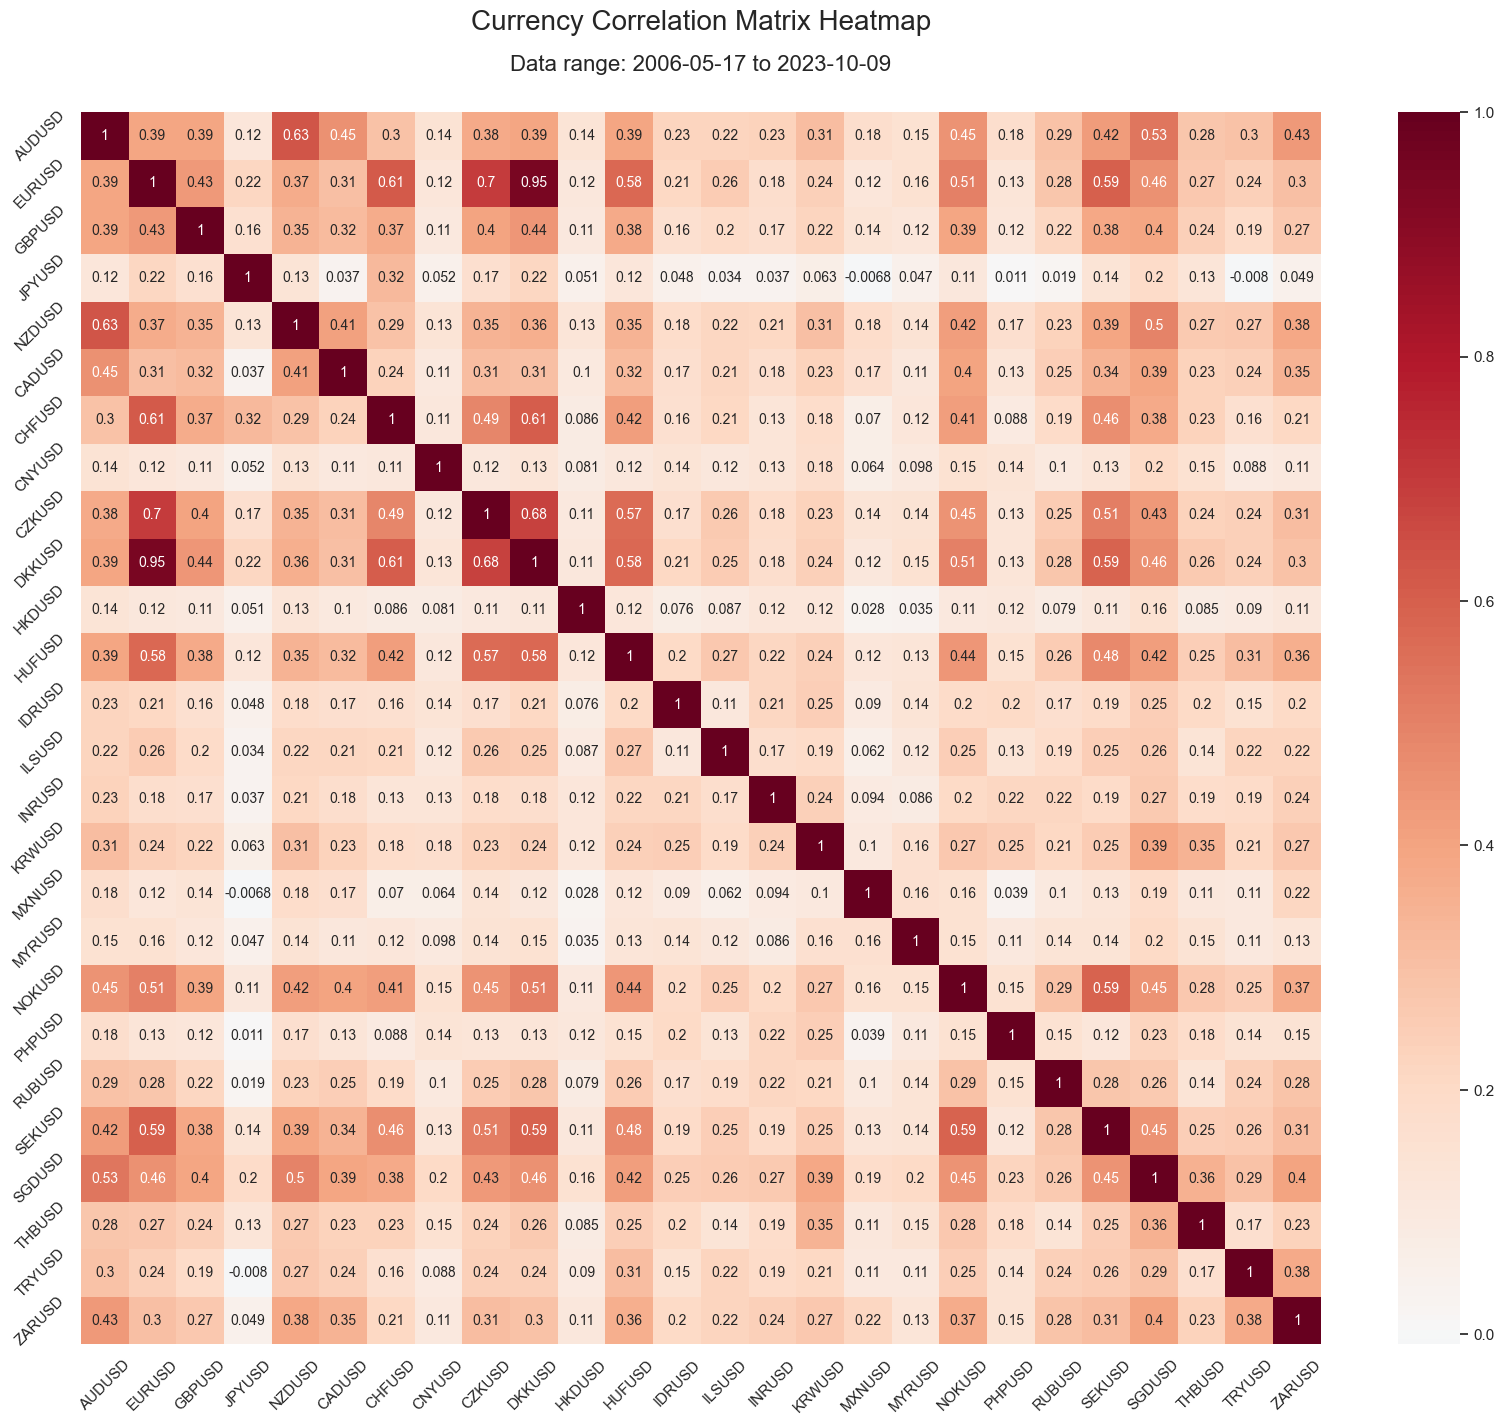

In [8]:
# Load the currency data from an csv file into a pandas DataFrame
df = pd.read_csv("Results/data_matrix.csv")

# Extract column names from the DataFrame excluding any non-currency columns like 'Date'
symbols = df.columns.tolist()[1:]

# Calculate the correlation matrix
correlation_matrix = df.drop(columns='Date').corr()

# Visualise the correlation matrix using the defined function
plot_heatmap(correlation_matrix, symbols, "Currency Correlation Matrix Heatmap", "Data range: 2006-05-17 to 2023-10-09")

In [12]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
import pandas as pd
import numpy as np

# Let's define a function that takes in the J matrix and returns the data sources
# for positive and negative couplings histograms. This function will be prepared
# for integration with the existing Bokeh app.

def calculate_couplings_histogram(j_matrix_df):
    """
    This function calculates the histograms for the positive and negative couplings
    from a J matrix, considering a log scale for the bins.
    
    Parameters:
    - j_matrix_df: A pandas DataFrame representing the J matrix.
    
    Returns:
    - A tuple of ColumnDataSources for positive and negative histograms.
    """
    # Convert dataframe to numpy array and extract upper triangle values
    j_matrix = j_matrix_df.values
    upper_triangle_indices = np.triu_indices_from(j_matrix, k=1)
    j_values = j_matrix[upper_triangle_indices]
    
    # Separate positive and negative couplings
    positive_couplings = j_values[j_values > 0]
    negative_couplings = -j_values[j_values < 0]  # Make negative values positive
    
    # Calculate logarithmic bins
    positive_bins = np.logspace(np.log10(positive_couplings.min()), np.log10(positive_couplings.max()), num=50)
    negative_bins = np.logspace(np.log10(negative_couplings.min()), np.log10(negative_couplings.max()), num=50)
    
    # Compute histograms
    positive_histogram, _ = np.histogram(positive_couplings, bins=positive_bins, density=True)
    negative_histogram, _ = np.histogram(negative_couplings, bins=negative_bins, density=True)
    
    # Prepare data for plotting
    positive_bin_edges = positive_bins[:-1]
    negative_bin_edges = negative_bins[:-1]
    
    # Create ColumnDataSources for positive and negative histograms
    positive_source = ColumnDataSource(data=dict(bin_edges=positive_bin_edges, histogram=positive_histogram))
    negative_source = ColumnDataSource(data=dict(bin_edges=negative_bin_edges, histogram=negative_histogram))
    
    return positive_source, negative_source

positive_source, negative_source = calculate_couplings_histogram(pd.read_csv("Results/J_matrix.csv"))

In [18]:
from bokeh.plotting import figure, show
from bokeh.models import LogScale, ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.io import output_notebook

import numpy as np

# Since J is a symmetric matrix, we will consider only the upper triangle (excluding the diagonal)
# Convert the dataframe to a numpy array for efficient computation
j_matrix = pd.read_csv("Results/J_matrix.csv").values
upper_triangle_indices = np.triu_indices_from(j_matrix, k=1)

# Extract the upper triangle values of the J matrix
j_values = j_matrix[upper_triangle_indices]

# Separate the positive and negative couplings
positive_couplings = j_values[j_values > 0]
negative_couplings = -j_values[j_values < 0]  # Multiply by -1 to make values positive for log scale

# Calculate the histograms for the positive and negative couplings using logarithmic bins
# Since we want to plot on a log scale, we need to use logarithmic bins. We determine the range of values
# and create bins that increase exponentially (logarithmically spaced bins).
positive_bins = np.logspace(np.log10(positive_couplings.min()), np.log10(positive_couplings.max()), num=100)
negative_bins = np.logspace(np.log10(negative_couplings.min()), np.log10(negative_couplings.max()), num=100)

# Compute the histograms
positive_histogram, positive_bins = np.histogram(positive_couplings, bins=positive_bins, density=True)
negative_histogram, negative_bins = np.histogram(negative_couplings, bins=negative_bins, density=True)

# To plot the histogram, we need the bin edges and the histogram values. Bokeh will use the 
# lower edge of the bins to plot the histogram, so we take the lower edge for each bin.
positive_bin_edges = positive_bins[:-1]
negative_bin_edges = negative_bins[:-1]

# Now we have the data needed to plot the pdfs for the positive and negative couplings.
# Let's return the histograms and bin edges for use in plotting.
(positive_histogram, positive_bin_edges, negative_histogram, negative_bin_edges)

# Initialize the output method for Bokeh
output_notebook()

# We'll create two figures for the positive and negative coupling constants histograms
# Define the data sources for the plots
positive_source = ColumnDataSource(data=dict(bin_edges=positive_bin_edges, histogram=positive_histogram))
negative_source = ColumnDataSource(data=dict(bin_edges=negative_bin_edges, histogram=negative_histogram))

# Create the figure for the positive couplings histogram
positive_fig = figure(title="PDF of Positive Couplings", tools="pan,wheel_zoom,box_zoom,reset",
                      x_axis_type="log", y_axis_type="log", sizing_mode="stretch_width",
                      height=250)
positive_fig.line(x='bin_edges', y='histogram', line_width=2, color='green', source=positive_source)

# Create the figure for the negative couplings histogram
negative_fig = figure(title="PDF of Negative Couplings", tools="pan,wheel_zoom,box_zoom,reset",
                      x_axis_type="log", y_axis_type="log", sizing_mode="stretch_width",
                      height=250)
negative_fig.line(x='bin_edges', y='histogram', line_width=2, color='blue', source=negative_source)

# Arrange the plots in a grid
grid = gridplot([[positive_fig], [negative_fig]], sizing_mode="scale_width")

# Show the grid
show(grid)


Loading BokehJS ...

In [19]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
import numpy as np
import pandas as pd

# Load data
j_matrix = pd.read_csv("Results/J_matrix.csv").values
upper_triangle_indices = np.triu_indices_from(j_matrix, k=1)
j_values = j_matrix[upper_triangle_indices]
positive_couplings = j_values[j_values > 0]
negative_couplings = -j_values[j_values < 0]

# Calculate logarithmic bins
positive_bins = np.logspace(np.log10(positive_couplings.min()), np.log10(positive_couplings.max()), num=100)
negative_bins = np.logspace(np.log10(negative_couplings.min()), np.log10(negative_couplings.max()), num=100)

# Compute histograms (normalized)
positive_histogram, _ = np.histogram(positive_couplings, bins=positive_bins, density=True)
negative_histogram, _ = np.histogram(negative_couplings, bins=negative_bins, density=True)

# Initialize Bokeh output
output_notebook()

# Create figures
positive_fig = figure(title="PDF of Positive Couplings", tools="pan,wheel_zoom,box_zoom,reset",
                      x_axis_type="log", y_axis_type="log", sizing_mode="stretch_width",
                      height=250, y_range=(1e-5, 1))
positive_fig.line(x=positive_bins[:-1], y=positive_histogram, line_width=2, color='green')

negative_fig = figure(title="PDF of Negative Couplings", tools="pan,wheel_zoom,box_zoom,reset",
                      x_axis_type="log", y_axis_type="log", sizing_mode="stretch_width",
                      height=250, y_range=(1e-5, 1))
negative_fig.line(x=negative_bins[:-1], y=negative_histogram, line_width=2, color='blue')

# Arrange the plots in a grid
grid = gridplot([[positive_fig], [negative_fig]], sizing_mode="scale_width")

# Show the grid
show(grid)


Loading BokehJS ...